### Section 3: Let's code

Today, we will look at some coding in R. You will be learning
* how to look at and summarize your data
* how to run basic regressions
* how to interpret regression outputs
* how to interpret some of the most important techniques when running regressions
* how to visualize data and regression results (more on that next time!)

We will be using a (fictional) dataset on wages in California. We are interested whether there is a "gender wage gap", and how education and age affect one's earnings.

### Creating a fictional dataset

By now, you should know how to read in data. I will not be going over this. Instead, I will just show a piece of code that generates the dataset which we will be using. This can be useful for various things. 

You do not need to understand everything in this section.

In [15]:
set.seed(123456789)
dataset = data.frame(seq(1, 3000))
dataset$n = dataset$seq.1..3000.
dataset$seq.1..3000.=NULL
dataset$minority = 0
dataset$minority[dataset$n>=1613]=1
dataset$n = NULL

# Individual effect
dataset$individual = rnorm(3000,0,1)
# Gender effect (related to education)
dataset$rminority = rbinom(3000, 1, 0.1)*dataset$minority


sampleDist = function(n) { 
    sample(x = c(8,9,10,11,12,13,14,15,16,9,10,11,12,13,14,10,11,15,12,17,17,10,12,11,13,15,15,14, 12, 12, 16, 11, 10, 10, 7, 10, 12, 12, 15, 15, 8, 9, 10, 12), n, replace = T) 
    }

# Make education variable
dataset$education = sampleDist(3000)
dataset$education = round(dataset$education+dataset$rminority*(-4)*runif(3000,1,2)+rnorm(3000,0,0.1),digits=0)
dataset$education[dataset$education<=4] = 7
dataset$education[dataset$education==5] = 7
dataset$education[dataset$education==6] = 8

# Played videogames in childhood
dataset$videogames_childhood = round(runif(3000,0,8),digits=1)

# Education squared
dataset$educationsquared = (dataset$education)*(dataset$education)

# Wages
dataset$wage_monthly = 2000 + 100*dataset$individual - 50*dataset$minority + 100*(dataset$education)

dataset$meduc = dataset$minority*dataset$education
# Hourly wages
dataset$wage_hourly = 10 + 2*dataset$individual - 2*dataset$minority + 1.5*(dataset$education) + 1*dataset$meduc
# Age
dataset$age = round(runif(3000,25,70),digits=0)
dataset$agesquared = dataset$age*dataset$age
# Yearly wages
dataset$wage_yearly = 15000 + 1000*dataset$education + 1000*dataset$age - 9*dataset$agesquared + 1000*dataset$individual

dataset$individual = NULL
dataset$rminority = NULL
dataset$n = NULL
dataset$agesquared = NULL
dataset$educationsquared=NULL
dataset$meduc=NULL

dataset$minority[dataset$minority==0]="Not a minority"
dataset$minority[dataset$minority==1]="Minority"
print("Dataset successfully generated")

[1] "Dataset successfully generated"


### Descriptives statistics

Let us have a look at the data:

In [16]:
colnames(dataset)
head(dataset)

[1] "minority"             "education"            "videogames_childhood"
[4] "wage_monthly"         "wage_hourly"          "age"                 
[7] "wage_yearly"

,minority,education,videogames_childhood,wage_monthly,wage_hourly,age,wage_yearly
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Not a minority,15,6.2,3550.487,33.50974,67,57103.87
2,Not a minority,12,7.5,3239.588,28.79175,35,51370.88
3,Not a minority,15,1.4,3641.554,35.33108,51,59006.54
4,Not a minority,9,5.2,2827.768,22.05535,41,49148.68
5,Not a minority,12,5.8,3138.164,26.76329,39,51692.64
6,Not a minority,12,0.1,3043.738,24.87476,27,45876.38


A couple of warm-up quiz questions for you:
* How many observations are there in the dataset?
* How many variables are there in the dataset?
* What proportion of the data is minority member?
* What is the average monthly wage in the data?

In [23]:
dim(dataset)

mean(dataset$minority)




# Minorities

# mean(data$minority)
# Ouch! Need to convert data - this is character, not numeric

# Alternative 1: Recode values using dplyr and recode function
library(dplyr)
dataset$minority = as.numeric(recode(dataset$minority, "Minority" = 1, "Not a minority"=0))


round(mean(dataset$minority),2)
round(mean(dataset$wage_monthly),0)

[1] 3000    7

[1] 0.4626667

Warning message in recode.numeric(dataset$minority, Minority = 1, `Not a minority` = 0):
“NAs introduced by coercion”


[1] 0.46

[1] 3166

Let us summarize the education data. What are mean and standard deviation? How does the data look like? Is there anything you notice?

You can do the same thing for monthly wages. Are there any outliers? How would you treat them?

[1] 11.85867

[1] 2.571166

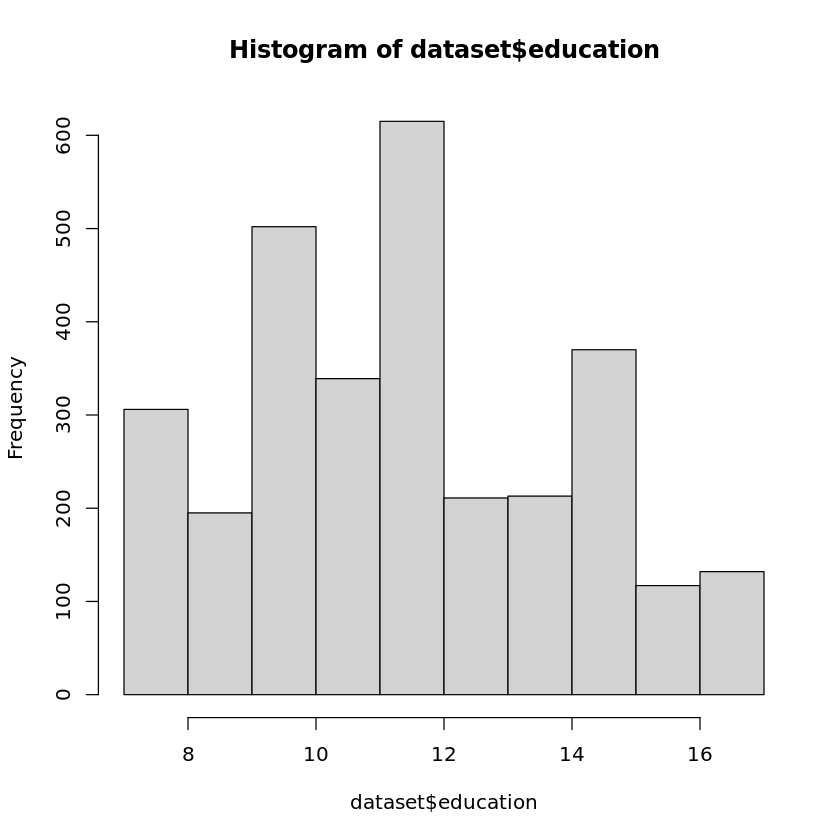

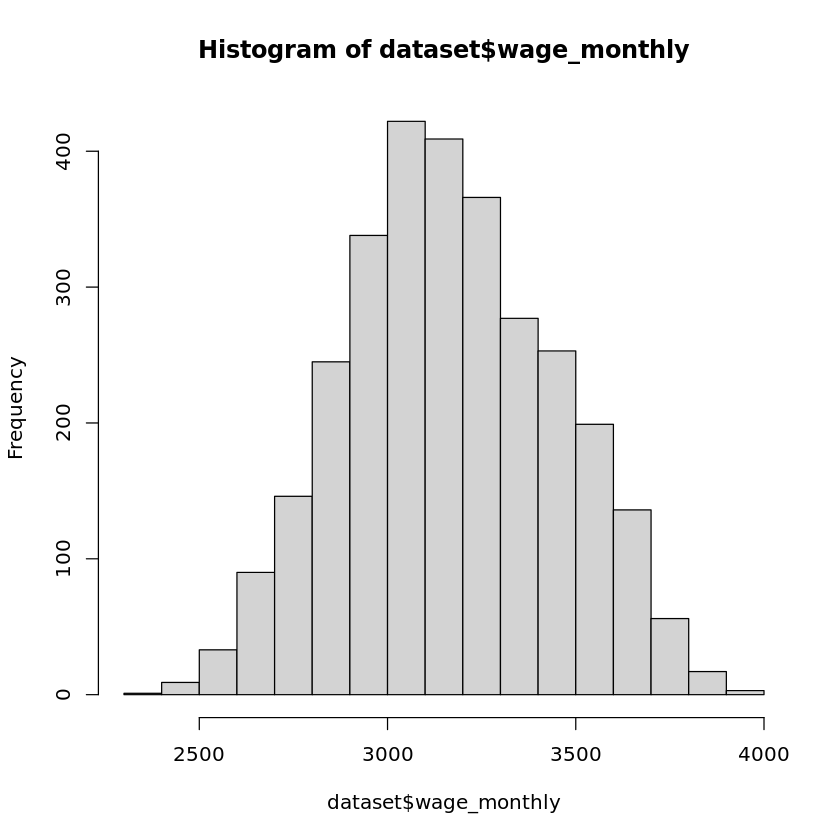

In [26]:
mean(dataset$education)
sd(dataset$education)

hist(dataset$education)
hist(dataset$wage_monthly)

We don't see any outliers in the wage data. We could either drop outliers from our analysis, or we could recode them as a high non-outlier value.

### Digging more into the data: Is there a minority wage gap?

Let us compare the difference in average wages for members of a minority and individuals that are not members of a minority.



In [27]:
non_min_mean = round(mean(dataset$wage_monthly[dataset$minority==0]),3)
min_mean = round(mean(dataset$wage_monthly[dataset$minority==1]),3)
min_mean
non_min_mean
round(min_mean - non_min_mean,3)


[1] 3125.457

[1] 3200.333

[1] -74.876

We can also run a basic linear model of wages ($w_i$), which we regress on being member of a minority ($m_i$):

$$
w_i = \alpha + \beta_m \cdot \text{minority}_i + \epsilon_i
$$

How would you run this in ```R```?

In [28]:
minority_regression = summary(lm(wage_monthly ~ minority , data=dataset))
print(minority_regression)



Call:
lm(formula = wage_monthly ~ minority, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-755.30 -195.73  -16.22  201.80  837.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3200.333      6.898 463.975  < 2e-16 ***
minority     -74.876     10.141  -7.384 1.98e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 276.9 on 2998 degrees of freedom
Multiple R-squared:  0.01786,	Adjusted R-squared:  0.01753 
F-statistic: 54.52 on 1 and 2998 DF,  p-value: 1.983e-13



### Questions and food for thought


* **How does the regression related to the averages we calculated before?**

Answer: The intercept is the average for non-minorities. The coefficient on minorities shows the differences in average wages between minorities and non-minorities. In a **saturated regression** (where there is a dummy variable for each unique combination of group memberships), this is always true!
* **What is the meaning of the intercept?**

Answer: The intercept is always the 'conditional mean': The expected value of the outcome variable, conditional on all other variables being zero. Here, it is simply the average wage for non-minorities (```minority=0```).
* **What is the meaning of the coefficient on ```minority```?**

This shows the difference in average wages between minorities and non-minorities.
* **What do the other parts of the output mean?**

Interpretation of standard error (measure of precision of estimate: The smaller the standard error, the more precise the estimate), and t-statistic (coefficient divided by standard error). A t-statistic above 2 is equivalent to a p-value below 0.05. 
In this case, we could also reject the null hypothesis that minorities earn 100$ less than non-minorities: -74.9 (coefficient) minus 2*10.1 (standard error) is greater than (in absolute terms) -100.

* **Can you interpret the coefficient as the "minority wage gap"?**

This is an "unconditional wage gap" - not adjusted for any other effects. This is very important and interesting for policy, but this alone does not tell us the causal effect of belonging to a minority on wages, or whether there is discrimination in the labor market.



Let us consider whether videogames are determinants of wages. Let's include this in the regression as well.

In [29]:
# Include videogames
example_regression = summary(lm(wage_monthly ~ education + minority + videogames_childhood , data=dataset))
print(example_regression)



Call:
lm(formula = wage_monthly ~ education + minority + videogames_childhood, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.89  -67.48   -0.46   70.15  362.48 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1994.8079     9.6242  207.27   <2e-16 ***
education             100.3332     0.7238  138.61   <2e-16 ***
minority              -45.1790     3.7319  -12.11   <2e-16 ***
videogames_childhood    0.4921     0.8062    0.61    0.542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 2996 degrees of freedom
Multiple R-squared:  0.8675,	Adjusted R-squared:  0.8674 
F-statistic:  6539 on 3 and 2996 DF,  p-value: < 2.2e-16



**How would you interpret this regression? How do you interpret the constant here - and what about the coefficients on male and videogames?**
Answer: The coefficient on videogame is not statistically different from zero. The intercept now is the expected earnings for individuals with zero years of education, who are non-minority members, and played zero hours of videogames in their childhood.

### Omitted variable bias

Since we also have education in our dataset, let us use it. Do you think education might be an "omitted variable"?

**How does our estimate of the "minority wage gap" change if we include education as an additional variable in the regression?** 


In [8]:
full_regression = summary(lm(wage_monthly ~ education + minority , data=dataset))
print(full_regression)


Call:
lm(formula = wage_monthly ~ education + minority, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.15  -67.69   -0.43   70.13  363.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1996.8155     9.0439  220.79   <2e-16 ***
education    100.3295     0.7237  138.63   <2e-16 ***
minority     -45.1697     3.7315  -12.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 2997 degrees of freedom
Multiple R-squared:  0.8675,	Adjusted R-squared:  0.8674 
F-statistic:  9811 on 2 and 2997 DF,  p-value: < 2.2e-16



### The OVB formula
We saw above that our estimate of the minority wage gap has become smaller once we control for education. 


To formally investigate how the estimate for one coefficient changes if we include more variables in the regression, we do a small experiment. 

We will be running three regressions:
* 1: Full regression: Include minority and education
* 2: Short (biased) regression: Include minority only
* 3: Auxiliary regression: Regress education on minority

Can you find a relation between the coefficients?

In [14]:
full_regression = summary(lm(wage_monthly ~ education + minority , data=dataset))
print(full_regression)

true_coefficient = full_regression$coefficients[3,1]
omitted_coefficient = full_regression$coefficients[2,1]

short_regression = summary(lm(wage_monthly ~ minority , data=dataset))
print(short_regression)
biased_coefficient = short_regression$coefficients[2,1]

auxiliary_regression =summary(lm(education ~ minority , data=dataset))
print(auxiliary_regression)
auxiliary_coefficient = auxiliary_regression$coefficients[2,1]

print(biased_coefficient)
print(true_coefficient + auxiliary_coefficient*omitted_coefficient)



Call:
lm(formula = wage_monthly ~ education + minority, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.15  -67.69   -0.43   70.13  363.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1996.8155     9.0439  220.79   <2e-16 ***
education    100.3295     0.7237  138.63   <2e-16 ***
minority     -45.1697     3.7315  -12.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 2997 degrees of freedom
Multiple R-squared:  0.8675,	Adjusted R-squared:  0.8674 
F-statistic:  9811 on 2 and 2997 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_monthly ~ minority, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-755.30 -195.73  -16.22  201.80  837.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3200.333      6.898 463.975  < 2e-16 ***
minority     -74.876     10.141  -7.384 1.98e-13 ***
---
Signif. codes:  0 ‘***’ 0.0

### The Omitted Variable Bias Formula

From these regressions, we see that there is the following relation between the coefficients:

$$ \beta_S = \beta_L + \gamma \cdot \delta $$

where $\beta_L$ is the "long" coefficient, $\gamma$ is the coefficient of the omitted variable in the long regression, $\delta$ is the coefficient in the auxiliary regression, and $\beta_S$ is the "short" regression coefficient.

This relation is ALWAYS true - no matter whether we consider causality or now.

We can think about this to think about the direction of bias - in a crude way. In our case, $\gamma$ is positive, and $\delta$ is positive as well - so the coefficient from the "short" regression is larger than the coefficient from the "long" regression - as we saw in the regression output!

Let us take a different example. We want to know whether a (non-random) support program for low-income students in a local high school increased their test scores. We regress test scores on the support program and find a negative coefficient. Does this mean that the program had a negative effect on grades?

No! We can use the OVB formula to think about the most important omitted variable in this case: Parents' education (and income, etc.). The higher parents' income, the lower the probability that a child is eligible for the support program ($\delta<0$). At the same time, the higher parents' education, the better childrens' test scores tend to be ($\gamma>0$). Therefore, we expect a negative bias: The coefficient when just running test scores on the program is smaller than if we include parents' education! **Neat!**


## Interpreting Interaction Terms (NEXT WEEK)

Maybe the effect of education is different between male and female respondents. To investigate this, we can use a technique called "Interaction Terms". Let us first create a variable that is the product of male and education.

In [10]:
dataset$minority_times_education = dataset$minority*dataset$education


We will be using hourly wages instead of monthly wages for this analysis. 
Our regression model looks like this. 

$$
w_i = \alpha + \beta_m \cdot \text{minority}_i + \beta_e \cdot \text{education}_i + \beta_{me} \cdot \text{minority}_i \cdot \text{education}_i + \epsilon_i
$$


How would we interpret the coefficients?

* Interpret $\beta_m$
* Interpret $\beta_e$
* Interpret $\beta_{me}$


Let us run the regression and have a look at the results:

In [11]:
interact_regression = summary(lm(wage_hourly ~ education + minority + minority_times_education , data=dataset))
print(interact_regression)

# Sidenote: There is a more elegant way to do it:
interact_regression = summary(lm(wage_hourly ~ education + minority + I(minority*education) , data=dataset))
print(interact_regression)


Call:
lm(formula = wage_hourly ~ education + minority + minority_times_education, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2015 -1.3592 -0.0067  1.3995  7.2704 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               9.91772    0.25086  39.535  < 2e-16 ***
education                 1.50814    0.02048  73.635  < 2e-16 ***
minority                 -1.86669    0.35107  -5.317 1.13e-07 ***
minority_times_education  0.99690    0.02895  34.430  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.035 on 2996 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9234 
F-statistic: 1.205e+04 on 3 and 2996 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_hourly ~ education + minority + I(minority * 
    education), data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2015 -1.3592 -0.0067  1.3995  7.2704 

Coefficients:

## Wage and age: Exploring a life-cycle relationship

We may also be interested in the relation between age and wages (for this part of the analysis, we use yearly wages). What do you think this relationship may look like? Will wages increase in age or become smaller as people become older?

Let us make a plot!

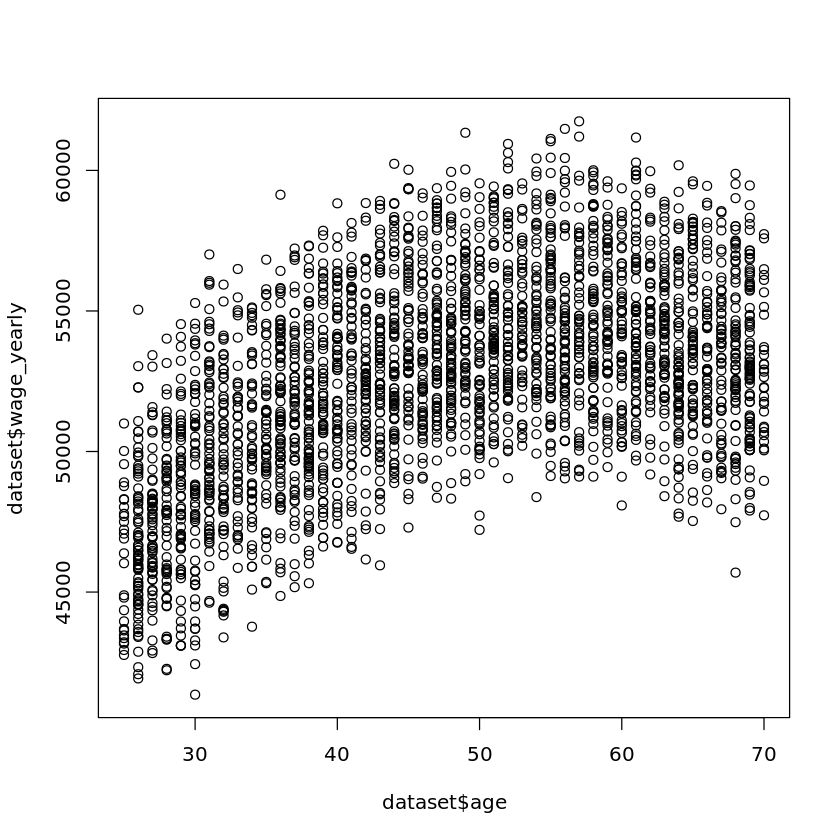

In [12]:
plot(dataset$age, dataset$wage_yearly)

How does this data look like? Do you think a simple linear model would fully capture the relationship between age age wages? What would you do to solve this issue?

Let us generate a new variable that is the square of the age. This looks like a parabola, so maybe we will be able to fit the data with a quadratic model.

In [13]:
dataset$agesquared = dataset$age*dataset$age

We now have a regression model that looks like this:

$$
w_i = \alpha + \beta_1 \cdot \text{age}_i + \beta_2 \cdot \text{age}_i^2 + \epsilon_i
$$

**How do we expect $w_i$ to change if age goes up by one year?**
This is just so awesome. The effect of age on wage can now be different for different values of age. To see this, we can just take a derivative:

$$
\frac{d\text{wage}_i}{d\text{age}_i} = \beta_1 + 2*\beta_2 \cdot \text{age}_i
$$

The derivative changes with age!

Let us run the regression with the squared term:

In [14]:
quadratic_regression = summary(lm(wage_yearly ~ education + age + agesquared , data=dataset))
print(quadratic_regression)

# Sidenote: There is a "more correct" way to do it:
quadratic_regression = summary(lm(wage_yearly ~ education + age + I(age^2) , data=dataset))
print(quadratic_regression)


Call:
lm(formula = wage_yearly ~ education + age + agesquared, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3667.0  -673.5    -8.6   700.8  3664.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14802.8098   280.8096   52.72   <2e-16 ***
education    1003.0722     7.2282  138.77   <2e-16 ***
age          1005.5033    11.6667   86.19   <2e-16 ***
agesquared     -9.0294     0.1216  -74.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1017 on 2996 degrees of freedom
Multiple R-squared:  0.9191,	Adjusted R-squared:  0.919 
F-statistic: 1.135e+04 on 3 and 2996 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_yearly ~ education + age + I(age^2), data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3667.0  -673.5    -8.6   700.8  3664.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14802.8098   280.8096   52.72   <2e-16

We can now also calculate the "tipping point" by setting the derivative from above to zero.
$$
\frac{d\text{wage}_i}{d\text{age}_i} = 0 \\
\Leftrightarrow 0 = \beta_1 + 2\beta_2 \cdot \text{age}_i
\Leftrightarrow \text{age}_i = - \frac{\beta_1}{2\beta_2}
$$
Plugging this in, we get $1005/(2*9)\approx 56$ years as the tipping point.

## Summary: What we learned

Today, we:
* Saw how to get some very basic information (like means, standard deviations, etc.) from a dataset
* learned how to generate new variables
* learned how to run linear regressions 
* learned how to interpret the output of linear regressions
* looked at what happens if we forget to include an important variable in our regression: **omitted variable bias**!
* Learned two key techniques which allow us to analyze much more rich economic patterns in the world: Interaction effects (**NEXT WEEK**) and quadratic terms.